# 10.5 AVERAGE OVER MANY DRAWS

Use this notebook to store your work for this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rand = default_rng().random
import random

Text(0, 0.5, 'Population')

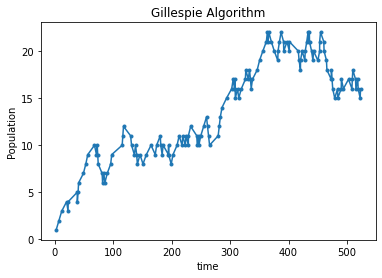

In [2]:
# Gillespie algorithm
ls = np.array([])
Ts = np.array([])
lave = np.array([])
l0 = 0
beta_birth = .15
k_death = 0.014
i = 0
N = 150

l = l0
T = 0

for n in range(N):
    rate = beta_birth + k_death * l
    t = - 1/rate * np.log(rand())
    xi = beta_birth / rate
    event = rand() < xi
    if event:
        l = l+1
        ls = np.append(ls,l)
        lave = np.append(ls,((np.cumsum(ls)/len(ls))))
    else:
        l = l-1
        ls = np.append(ls,l)
        lave = np.append(ls,((np.cumsum(ls)/len(ls))))
    T = T+t
    Ts = np.append(Ts,T)
plt.plot(Ts,ls,'.-')
plt.title('Gillespie Algorithm')
plt.xlabel('time')
plt.ylabel('Population')

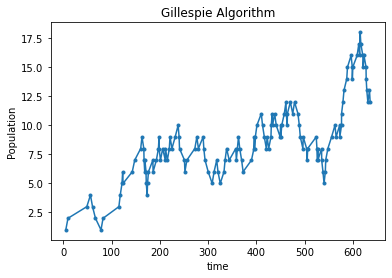

In [40]:
# Gillespie algorithm
ls = np.array([])
Ts = np.array([])
lave = np.array([])
ltest = np.array([])
l0 = 0
beta_birth = 0.15
k_death = 0.014
i = 0
N = 150

l = l0
T = 0

for n in range(N):
    rate = beta_birth + k_death * l
    t = - 1/(rate) * np.log(rand())
    xi = beta_birth / rate
    event = rand() < xi
    if event:
        l = l+1
        ls = np.append(ls,l)
        #lave = np.append(ls,((np.cumsum(ls)/len(ls))))
    else:
        l = l-1
        ls = np.append(ls,l)
        #lave = np.append(ls,((np.cumsum(ls)/len(ls))))
    T = T+t
    Ts = np.append(Ts,T)
    if np.argmax(Ts >= 300): lave = np.append(lave,ls[-1])
plt.plot(Ts,ls,'.-')
plt.title('Gillespie Algorithm')
plt.xlabel('time')
plt.ylabel('Population')
#plt.xlim(0,300)
lave = lave/len(lave)

Text(0, 0.5, 'Population')

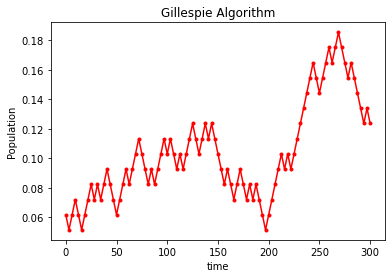

In [42]:
time1 = np.linspace(0,300,97)
plt.plot(time1,lave,'r.-')
plt.title('Gillespie Algorithm')
plt.xlabel('time')
plt.ylabel('Population')

Text(0.5, 1.0, 'Gillespie Algorithm')

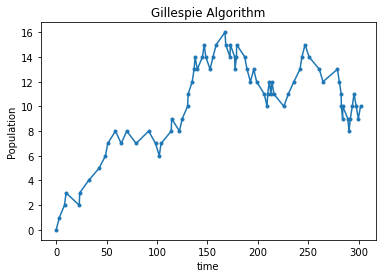

In [25]:
X = [0]
t = [0]
avedata = []

tend = 300

k = 0.15
gamma = 0.014

while t[-1] < tend:
    
    current_X = X[-1]
    
    rates = [k, gamma * current_X]
    rate_sum = sum(rates)
    
    tau = np.random.exponential(scale=1/rate_sum)
    
    t.append(t[-1] + tau)
    
    rando = random.uniform(0,1)
    
    if rando * rate_sum > 0 and rando * rate_sum < rates[0]:
        X.append(X[-1] + 1)
        avedata = np.append(avedata,X[-1])
    elif rando * rate_sum > rates[0] and rando * rate_sum < rates[0] + rates[1]:
        X.append(X[-1] - 1)
        np.array(t)
        avedata = np.append(avedata,X[-1])

avedata = avedata/len(avedata)
plt.plot(t,X,'.-')
plt.xlabel('time')
plt.ylabel("Population")
plt.title('Gillespie Algorithm')

Text(0.5, 1.0, 'Gillespie Algorithm')

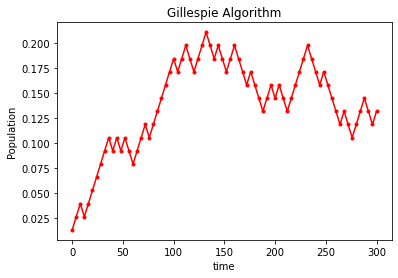

In [27]:
time = np.linspace(0,300,76)

plt.plot(time,avedata,'r.-')
plt.xlabel('time')
plt.ylabel("Population")
plt.title('Gillespie Algorithm')

They seem to be pretty similar, but to be honest I have no idea if I've done this correctly.